# DISASTER TWEETS CLASSIFICATION

## Import Necessary Libraries, Load and Inspect Dataset

In [20]:
# Data Analysis and Visualization
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Text Processing and Machine Learning
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [21]:
# Specify Dataset Path and Import Datsaets (Replace File Path as Needed)
train_path = "C:/Users/New/GitProjects/MyProjects/Text-Classification/Disaster Tweets Classification/train.csv"
test_path = "C:/Users/New/GitProjects/MyProjects/Text-Classification/Disaster Tweets Classification/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print(f"The train data has {train.shape[0]} rows and {train.shape[1]} columns ")
print(f"The test data has {test.shape[0]} rows and {test.shape[1]} columns ")

The train data has 7613 rows and 5 columns 
The test data has 3263 rows and 4 columns 


In [22]:
# Check General Condition of Datasets (Missing Values and Datatypes)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [23]:
# Check How Disaster Tweets Look Compared to Non-Disaster Tweets
nondisaster_tweet = train[train["target"] == 0]["text"].values[np.random.randint(0, 100)]
disaster_tweet = train[train["target"] == 1]["text"].values[np.random.randint(0, 100)]
print(nondisaster_tweet)
print(disaster_tweet)

Aftershock ã¢ (2010) Fullã¢ Streaming - YouTube http://t.co/vVE3UsesGf
#news Twelve feared killed in Pakistani air ambulance helicopter crash http://t.co/bFeS5tWBzt #til_now #DNA


## Simple Visualizations on Dataset

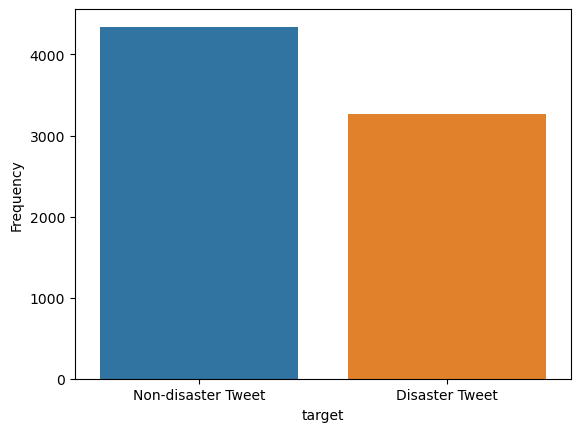

In [72]:
# Visualize the Distribution of the Target
sns.countplot(data = train, x = 'target')
plt.xticks([0,1], ['Non-disaster Tweet', 'Disaster Tweet'])
plt.ylabel('Frequency');

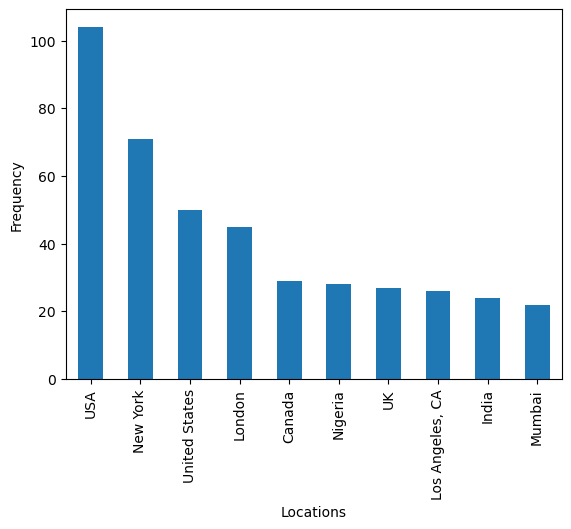

In [70]:
# Visualize the Top 10 Tweet Locations
train['location'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Locations')
plt.ylabel('Frequency');

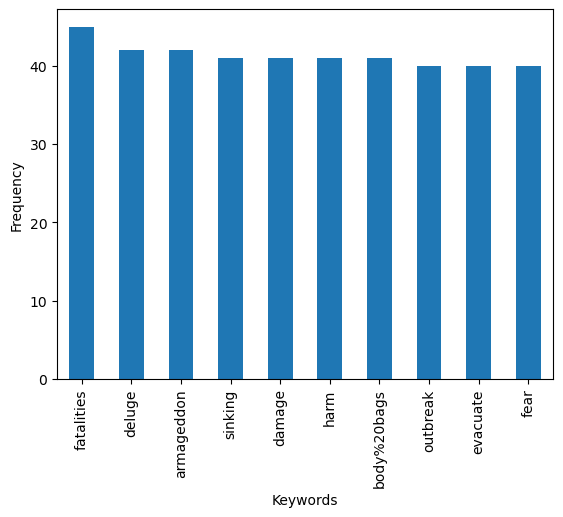

In [71]:
# Visualize the Top 10 Most Used Keywords
train['keyword'].value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Keywords')
plt.ylabel('Frequency');

## Cleaning and Preprocess Dataset Features

In [ ]:
def nan_remover(df):
    '''
    This function removes all nan values and replaces them with spaces and then concatenates
    the three columns in the dataset into one
    '''
    for col in df.columns:
        df[col] = df[col].fillna('')
        
    df['input'] = df['keyword'].astype(str) + '_' + df['location'] + '_' + df['text']
    
    return df
​
train = nan_remover(train)
test = nan_remover(test)

In [ ]:
# Remove Unwanted Characters from Text Using Text Cleaner Function
def text_cleaner(text):
    '''
    This text cleaner function removes unwanted special characters, whitespaces
    and links from texts and returns them cleaner and devoid of these special characters
    '''
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters like '?', '#', '@', etc.
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Turns Text into Lower Case
    text = text.lower()
    
    # Remove Punctuations
    text = text.replace('[{}]'.format(string.punctuation), '')
    
    return text

# Use Text Cleaner on Datasets
train['input'] = train['input'].apply(text_cleaner)
test['input'] = test['input'].apply(text_cleaner)

In [ ]:
# Create Tokens in Dataset Feature
def func_token(df):
    '''
    This function creates the tokens column, scans and takes out the stopwords and
    goes on to stem the tokenized text and update the token count.
    '''
    # Create Token Count Column
    df['tokens'] = df['input'].apply(word_tokenize)
    
    # Apply StopWorks Method on Tokens Column
    stop_words = set(stopwords.words('english'))   
    df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

    # Update the Word Token Count
    word_counts = Counter()
    df['tokens'].apply(word_counts.update)
    
    rare_words = set(word for word, count in word_counts.items() if count < 5)
    df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in rare_words])
    df['tokens'] = df.tokens.apply(', '.join)
        
    return df

trr = func_token(train)
tee = func_token(test)

## Vectorize Dataset and Split Dataset 

In [ ]:
# Separate features and target variable
X_train = trr["tokens"]
y_train = trr["target"]
X_test = tee["tokens"]
​
# Initialize Vectorizer (TF-IDF or Count)
#tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = CountVectorizer()
​
# Fit and transform on training data
X_train = vectorizer.fit_transform(X_train)
​
# Transform test data
X_test = vectorizer.transform(X_test)
​
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=420)

## Logistic Regression Model

In [ ]:
# Instantiate Logistic Regression Model
model = LogisticRegression()

# Train the Model
model.fit(X_train_split, y_train_split)
accuracy = model.score(X_train_split, y_train_split)
print(f" Training Accuracy: {accuracy}")

# Make Predictions on the validation set
val_predictions = model.predict(X_val_split)

# Calculate F1 and Accuracy score on the validation set
f1 = f1_score(y_val_split, val_predictions)
print(f" Validation F1 Score: {f1}")
accuracy = accuracy_score(y_val_split, val_predictions)
print(f" Validation Accuracy: {accuracy}")

# Make predictions on the test set
predictions = model.predict(X_test)

# Export Prediction to Dataframe 
results = pd.DataFrame({'id': test['id'], 'target': predictions})

## Naive Bayes Model (Complement Naive Bayes)

In [ ]:
model = ComplementNB()

# Train the Model
model.fit(X_train_split, y_train_split)
accuracy = model.score(X_train_split, y_train_split)
print(f" Training Accuracy: {accuracy}")

# Make Predictions on the validation set
val_predictions = model.predict(X_val_split)

# Calculate F1 and Accuracy score on the validation set
f1 = f1_score(y_val_split, val_predictions)
print(f" Validation F1 Score: {f1}")
accuracy = accuracy_score(y_val_split, val_predictions)
print(f" Validation Accuracy: {accuracy}")

# Make predictions on the test set
predictions = model.predict(X_test)

# Export Prediction to Dataframe 
results = pd.DataFrame({'id': test['id'], 'target': predictions})